# Experimental Data-Analysis 



In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
import  pandas      as      pd
import  numpy       as      np
from    pathlib     import  Path
from    dataclasses import  dataclass
import  math
import  matplotlib.pyplot as plt    

class   Experimento:
    def __init__(self, volt_iny, volt_elec, corr_elec, resistencia, temperatura):
        self.volt_iny    =   volt_iny
        self.volt_elec   =   volt_elec
        self.corr_elec   =   corr_elec
        self.resistencia =   resistencia
        self.temperatura =   temperatura

def _minlen(*list):
    return  min(len(lst) for lst in list)

def _minimum(exp1, exp2):
    if exp1[0] > exp2[0]:
        vl_min  =   exp1[0]
    else:
        vl_min  =   exp2[0]
    return vl_min

In [2]:
path_1  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/R2-E-A_20251123.csv")    # Path for the experiment 20250917
path_2  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/R2-E-A_20251124.csv")     # Path for the experiment 20250922
path_3  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/R2-E-B_20251124.csv")    # Path for the experiment 20250917
path_4  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Data/Experimental-Data/R2-E-C_20251124.csv")     # Path for the experiment 20250922

# Import the experiment "A_20251123"
df_1    =   pd.read_csv(path_1, encoding="latin-1")
# Import the experiment "A_20251124"
df_2    =   pd.read_csv(path_2, encoding="latin-1")
# Import the experiment "B_20251124"
df_3    =   pd.read_csv(path_3, encoding="latin-1")
# Import the experiment "C_20251124"
df_4    =   pd.read_csv(path_4, encoding="latin-1")

#df_1.head() 
#df_1.head()

cols_extract    =   ["Voltaje Inyectado (V)", "Voltaje Electrodos (V)", "Corriente Electrodos (A)", "Resistencia", "Temperatura "]
dt_exp1         =   df_1[cols_extract].copy()   #Exp A_20251123
dt_exp2         =   df_2[cols_extract].copy()   #Exp A_20251124
dt_exp3         =   df_3[cols_extract].copy()   #Exp B_20251124
dt_exp4         =   df_4[cols_extract].copy()   #Exp C_20251124

exp_1   =   Experimento(
    volt_iny    =   dt_exp1["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp1["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp1["Corriente Electrodos (A)"],
    resistencia =   dt_exp1["Resistencia"],
    temperatura =   dt_exp1["Temperatura "],
)

exp_2   =   Experimento(
    volt_iny    =   dt_exp2["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp2["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp2["Corriente Electrodos (A)"],
    resistencia =   dt_exp2["Resistencia"],
    temperatura =   dt_exp2["Temperatura "],
)

exp_3   =   Experimento(
    volt_iny    =   dt_exp3["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp3["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp3["Corriente Electrodos (A)"],
    resistencia =   dt_exp3["Resistencia"],
    temperatura =   dt_exp3["Temperatura "],
)

exp_4   =   Experimento(
    volt_iny    =   dt_exp4["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp4["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp4["Corriente Electrodos (A)"],
    resistencia =   dt_exp4["Resistencia"],
    temperatura =   dt_exp4["Temperatura "],
)

# Voltage from the both experiments 
volt_iny_r2_A23     =   exp_1.volt_iny.to_list()   #   voltage supply for exp_1
volt_iny_r2_A24     =   exp_2.volt_iny.to_list()   #   voltage supply for exp_2
volt_iny_r2_B24     =   exp_3.volt_iny.to_list()   #   voltage supply for exp_3
volt_iny_r2_C24     =   exp_4.volt_iny.to_list()   #   voltage supply for exp_4

volt_elec_r2_A23    =   exp_1.volt_elec.to_list()  #   from exp_1
volt_elec_r2_A24    =   exp_2.volt_elec.to_list()  #   from exp_2
volt_elec_r2_B24    =   exp_3.volt_elec.to_list()  #   from exp_3
volt_elec_r2_C24    =   exp_4.volt_elec.to_list()  #   from exp_4

#Current from the both experiments 
curr_elec_r2_A23    =   exp_1.corr_elec.to_list()   # Current electrodes from the exp_1
curr_elec_r2_A24    =   exp_2.corr_elec.to_list()   # Current electrodes from the exp_2
curr_elec_r2_B24    =   exp_3.corr_elec.to_list()   # Current electrodes from the exp_1
curr_elec_r2_C24    =   exp_4.corr_elec.to_list()   # Current electrodes from the exp_2

#Resistance from the both experiments
res_r2_A23          =   exp_1.resistencia.to_list() #   Resistance from the exp_1
res_r2_A24          =   exp_2.resistencia.to_list() #   Resistance from the exp_2
res_r2_B24          =   exp_3.resistencia.to_list() #   Resistance from the exp_3
res_r2_C24          =   exp_4.resistencia.to_list() #   Resistance from the exp_4

#Temperature from the experiments
temp_r2_A23         =   exp_1.temperatura.to_list() #   Temperature from the exp_1
temp_r2_A24         =   exp_2.temperatura.to_list() #   Temperature from the exp_2
temp_r2_B24         =   exp_3.temperatura.to_list() #   Temperature from the exp_3
temp_r2_C24         =   exp_4.temperatura.to_list() #   Temperature from the exp_4


In [3]:
# Now we filter the data for extract only the values that we need to work with
min_value       =   _minimum(volt_iny_r2_A23, volt_iny_r2_A24)  # Min value for extract the same number of values
print(min_value)
min_val_curr    =   1                                               # Exact value where start the measure of current across the plates
value_res_1     =   1.2                                             # First low limit for extract the value of the resistance
value_res_2     =   4                                             # Second low limit for extract the value of the resistace
max_value       =   6.0                                             # Value where the both experiments report the end of the experiment
pos_curr_22     =   0                                               # Value of position where is the value of the current 
pos_curr        =   0                                               # Value of position where is the value of the current 
pos_res1_22     =   0                                               # Value of position where is the value of the resistance                                                
pos_res2_22     =   0                                               # Value of position where is the value of the resistance                                            
pos_res1        =   0                                               # Value of position where is the value of the resistance 
pos_res2        =   0                                               # Value of position where is the value of the resistance 


volt_iny_filt_r2        =   []      #   Variable for the volt_iny filtered values

volt_elec_filt_r2_a_23  =   []      #   Variable for the volt_elec filtered values from the exp_1
volt_elec_filt_r2_a_24  =   []      #   Variable for the volt_elec filtered values from the exp_2
volt_elec_filt_r2_b_24  =   []      #   Variable for the volt_elec filtered values from the exp_3
volt_elec_filt_r2_c_24  =   []      #   Variable for the volt_elec filtered values from the exp_4


curr_elec_filt_r2_a_23  =   []      #   Variable for the curr_elec filtered values from the exp_1
curr_elec_filt_r2_a_24  =   []      #   Variable for the curr_elec filtered values from the exp_2
curr_elec_filt_r2_b_24  =   []      #   Variable for the curr_elec filtered values from the exp_3
curr_elec_filt_r2_c_24  =   []      #   Variable for the curr_elec filtered values from the exp_4

res_filt_r2_a_23        =   []      #   Variable for the resistance filtered values from the exp_1
res_filt_r2_a_24        =   []      #   Variable for the resistance filtered values from the exp_2
res_filt_r2_b_24        =   []      #   Variable for the resistance filtered values from the exp_3
res_filt_r2_c_24        =   []      #   Variable for the resistance filtered values from the exp_4

res_filt_r2_a_23_1      =   []      #   Variable for the resistance filtered values from the exp_1
res_filt_r2_a_24_1      =   []      #   Variable for the resistance filtered values from the exp_2
res_filt_r2_b_24_1      =   []      #   Variable for the resistance filtered values from the exp_3
res_filt_r2_c_24_1      =   []      #   Variable for the resistance filtered values from the exp_4

temp_filt_r2_a_23       =   []      #   Variable for the temperature filtered values from the exp_1
temp_filt_r2_a_24       =   []      #   Variable for the temperature filtered values from the exp_2
temp_filt_r2_b_24       =   []      #   Variable for the temperature filtered values from the exp_3
temp_filt_r2_c_24       =   []      #   Variable for the temperature filtered values from the exp_4 

pwr_consup_r2_a_23      =   []      #   Power Consumption of experiment r2_a_23 V_elec*I_elec
pwr_consup_r2_a_24      =   []      #   Power Consumption of experiment r2_a_24 V_elec*I_elec
pwr_consup_r2_b_24      =   []      #   Power Consumption of experiment r2_b_23 V_elec*I_elec
pwr_consup_r2_c_24      =   []      #   Power Consumption of experiment r2_c_24 V_elec*I_elec



for x in range(len(volt_iny_r2_A23)):
    if  min_value       <=  volt_iny_r2_A23[x]    <=  max_value:
        volt_iny_filt_r2.append(volt_iny_r2_A23[x])
        volt_elec_filt_r2_a_23.append(volt_elec_r2_A23[x])
        volt_elec_filt_r2_a_24.append(volt_elec_r2_A24[x])
        volt_elec_filt_r2_b_24.append(volt_elec_r2_B24[x])
        volt_elec_filt_r2_c_24.append(volt_elec_r2_C24[x])
    
    if  min_val_curr    <=  volt_iny_r2_A23[x]    <=  max_value:
        if  min_val_curr    ==  volt_iny_r2_A23[x]:
            pos_curr        =   x
        pwr_consup_r2_a_23.append(volt_elec_r2_A23[x]*curr_elec_r2_A23[x])
        pwr_consup_r2_a_24.append(volt_elec_r2_A24[x]*curr_elec_r2_A24[x])
        pwr_consup_r2_b_24.append(volt_elec_r2_B24[x]*curr_elec_r2_B24[x])
        pwr_consup_r2_c_24.append(volt_elec_r2_C24[x]*curr_elec_r2_C24[x])

        curr_elec_filt_r2_a_23.append(curr_elec_r2_A23[x])
        curr_elec_filt_r2_a_24.append(curr_elec_r2_A24[x])
        curr_elec_filt_r2_b_24.append(curr_elec_r2_B24[x])
        curr_elec_filt_r2_c_24.append(curr_elec_r2_C24[x])

        temp_filt_r2_a_23.append(temp_r2_A23[x])
        temp_filt_r2_a_24.append(temp_r2_A24[x])
        temp_filt_r2_b_24.append(temp_r2_B24[x])
        temp_filt_r2_c_24.append(temp_r2_C24[x])

    
    if  value_res_1     <=  volt_iny_r2_A23[x]    <=  max_value:
        if  value_res_1     ==  volt_iny_r2_A23[x]:
            pos_res1        =   x
        res_filt_r2_a_23.append(res_r2_A23[x])
        res_filt_r2_a_24.append(res_r2_A24[x])
        res_filt_r2_b_24.append(res_r2_B24[x])
        res_filt_r2_c_24.append(res_r2_C24[x])

    if  value_res_2     <=  volt_iny_r2_A23[x]    <=  max_value:
        if  value_res_2     ==  volt_iny_r2_A23[x]:
            pos_res2        =   x
        res_filt_r2_a_23_1.append(res_r2_A23[x])
        res_filt_r2_a_24_1.append(res_r2_A24[x])
        res_filt_r2_b_24_1.append(res_r2_B24[x])
        res_filt_r2_c_24_1.append(res_r2_C24[x])

#for x in range(len(volt_iny_20250922)):
#    if  min_value       <=  volt_iny_20250922[x]    <=  max_value:
#        volt_elec_filt_20250922.append(volt_elec_20250922[x])
#    
#    if  min_val_curr    <=  volt_iny_20250922[x]    <=  max_value:
#        if  min_val_curr    ==  volt_iny_20250922[x]:
#            pos_curr_22 =   x
#        pwr_consup_20250922.append(volt_elec_20250922[x]*curr_elec_20250922[x]) 
#        curr_elec_filt_20250922.append(curr_elec_20250922[x])
#    
#    if  value_res_1     <=  volt_iny_20250922[x]    <=  max_value:
#        if  value_res_1     ==  volt_iny_20250922[x]:
#            pos_res1_22 =   x
#        res_filt_20250922.append(res_20250922[x])
#    
#    if  value_res_2     <=  volt_iny_20250922[x]    <=  max_value:
#        if  value_res_2     ==  volt_iny_20250922[x]:
#            pos_res2_22 =   x
#        res_filt_20250922_1.append(res_20250922[x])

print(f"The length of 'volt_iny'= {len(volt_iny_filt_r2)}, 'volt_elec_A23'={len(volt_elec_filt_r2_a_23)}, 'volt_elec_A24'={len(volt_elec_filt_r2_a_24)}, 'volt_elec_B24'={len(volt_elec_filt_r2_b_24)}, 'volt_elec_C24'={len(volt_elec_filt_r2_c_24)}")
print(f"The length of 'curr_elec_A23'={len(curr_elec_filt_r2_a_23)}, 'curr_elec_A24'={len(curr_elec_filt_r2_a_24)}, 'curr_elec_B24'={len(curr_elec_filt_r2_b_24)}, 'curr_elec_C24'={len(curr_elec_filt_r2_c_24)}")
print(f"The length of 'resistance_A23'={len(res_filt_r2_a_23)}, 'resistance_A24'={len(res_filt_r2_a_24)}, 'resistance_B24'={len(res_filt_r2_b_24)}, 'resistance_C24'={len(res_filt_r2_c_24)} ")
print(f"The length of 'resistance_A23_1'={len(res_filt_r2_a_23_1)}, 'resistance_A24_1'={len(res_filt_r2_a_24_1)}, 'resistance_B24_1'={len(res_filt_r2_b_24_1)}, 'resistance_C24_1'={len(res_filt_r2_c_24_1)} ")
print(f"The length of 'Temperature_A23'={len(temp_filt_r2_a_23)}, 'Temperature_A24'={len(temp_filt_r2_a_24)}, 'Temperature_B24'={len(temp_filt_r2_b_24)}, 'Temperature_C24'={len(temp_filt_r2_c_24)}")
print(f"The length of 'power_consum_A23'={len(pwr_consup_r2_a_23)}, 'power_consum_A24'={len(pwr_consup_r2_a_24)}, 'power_consum_B24'={len(pwr_consup_r2_b_24)}, 'power_consum_C24'={len(pwr_consup_r2_c_24)}")
print(f"The position of 'curr_17'={pos_curr}")
print(f"The position of 'res1_17'={pos_res1}")
print(f"The position of 'res2_17'={pos_res2}")



0.11
The length of 'volt_iny'= 60, 'volt_elec_A23'=60, 'volt_elec_A24'=60, 'volt_elec_B24'=60, 'volt_elec_C24'=60
The length of 'curr_elec_A23'=51, 'curr_elec_A24'=51, 'curr_elec_B24'=51, 'curr_elec_C24'=51
The length of 'resistance_A23'=49, 'resistance_A24'=49, 'resistance_B24'=49, 'resistance_C24'=49 
The length of 'resistance_A23_1'=21, 'resistance_A24_1'=21, 'resistance_B24_1'=21, 'resistance_C24_1'=21 
The length of 'Temperature_A23'=51, 'Temperature_A24'=51, 'Temperature_B24'=51, 'Temperature_C24'=51
The length of 'power_consum_A23'=51, 'power_consum_A24'=51, 'power_consum_B24'=51, 'power_consum_C24'=51
The position of 'curr_17'=9
The position of 'res1_17'=11
The position of 'res2_17'=39


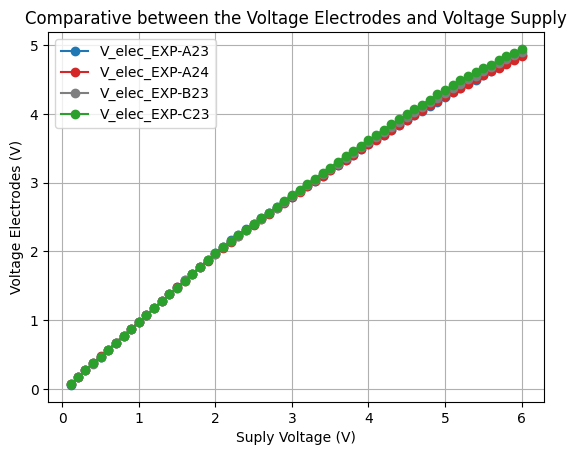

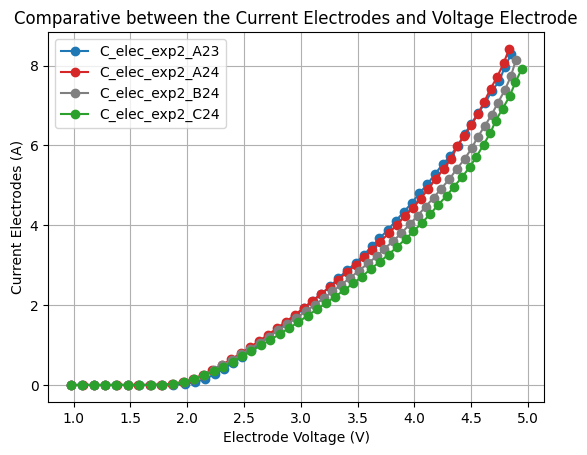

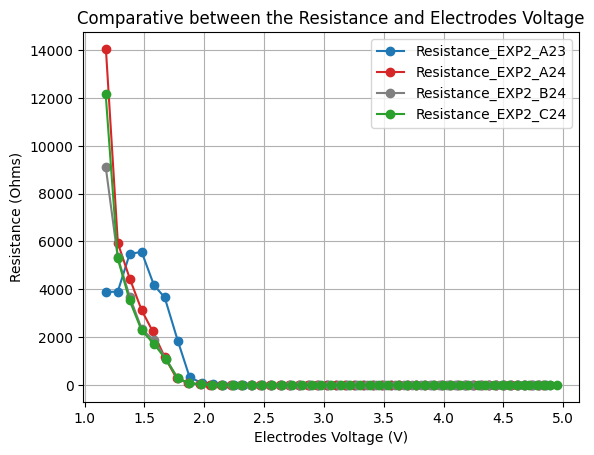

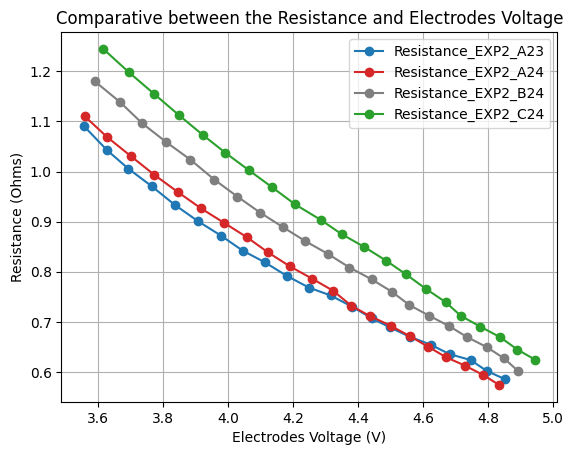

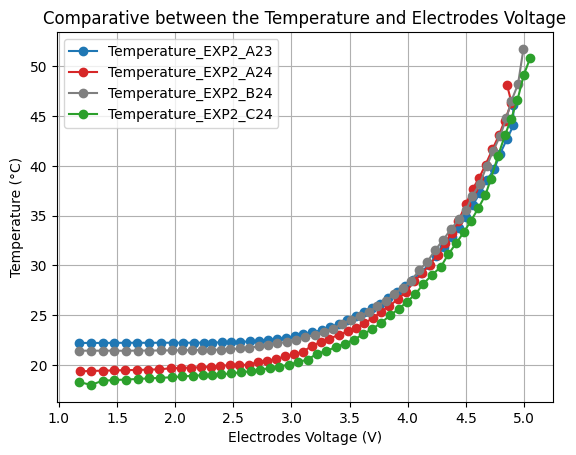

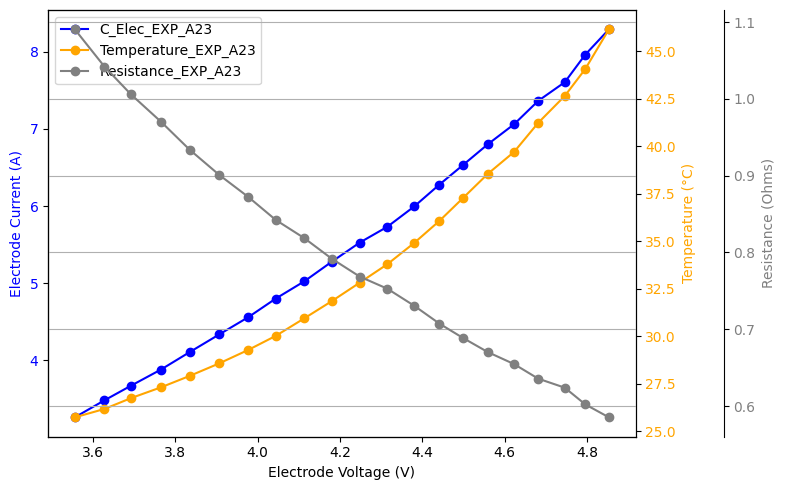

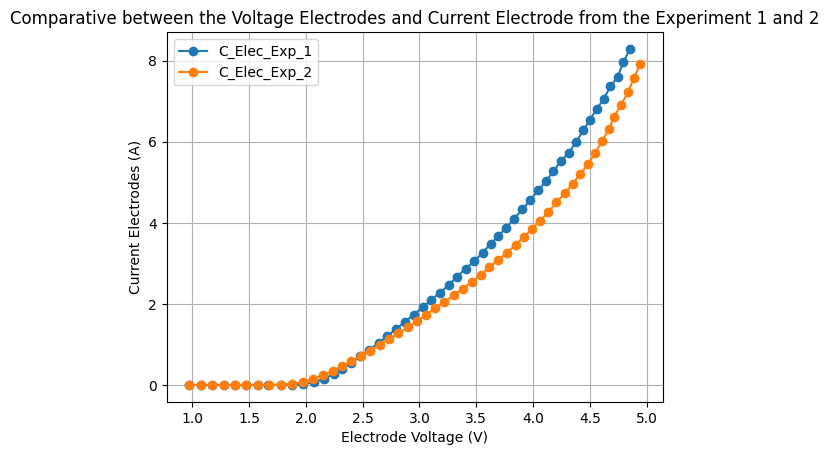

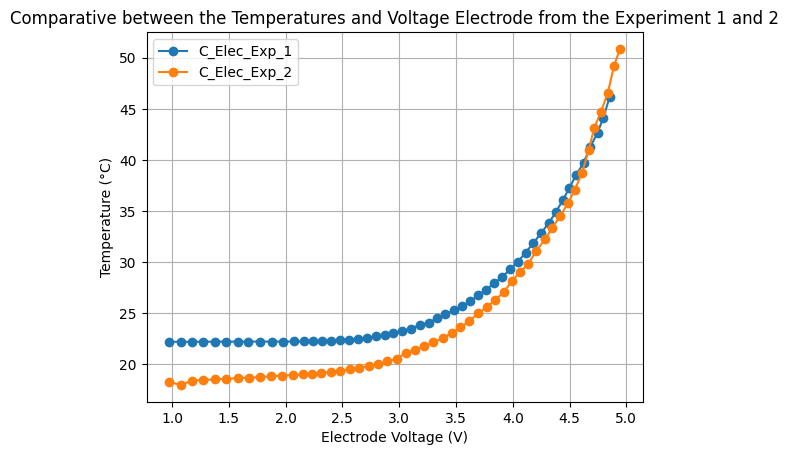

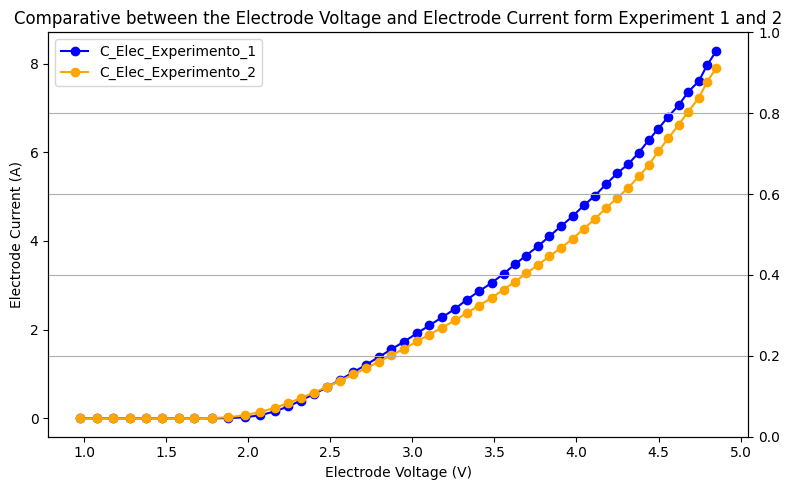

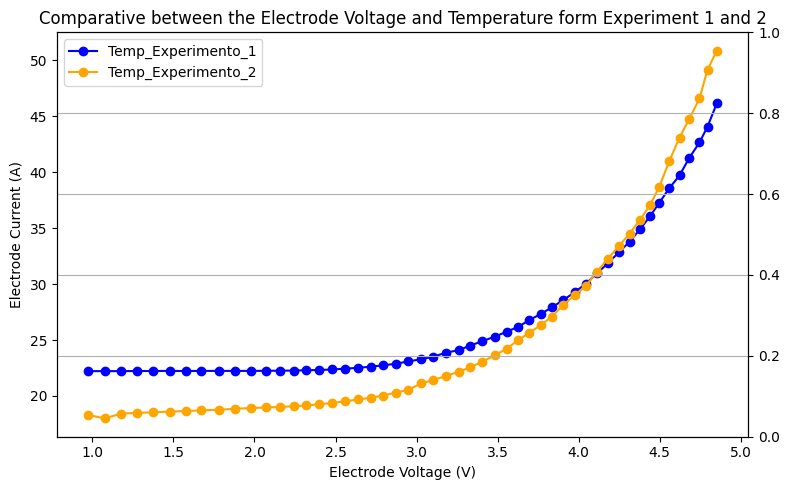

In [4]:


# Ploting "volt_iny_filt_20250917 (x)" vs "volt_elec_20250917" - "volt_elec_20250922" (y)

n1  =   _minlen(volt_iny_filt_r2, volt_elec_filt_r2_a_23, volt_elec_filt_r2_a_24, volt_elec_filt_r2_b_24, volt_elec_filt_r2_b_24)
x1  =   volt_iny_filt_r2[:n1]
y1  =   volt_elec_filt_r2_a_23
y2  =   volt_elec_filt_r2_a_24
y3  =   volt_elec_filt_r2_b_24
y4  =   volt_elec_filt_r2_c_24

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='V_elec_EXP-A23')
plt.plot(x1, y2, marker='o', linestyle='-', color='tab:red', label='V_elec_EXP-A24')
plt.plot(x1, y3, marker='o', linestyle='-', color='tab:gray', label='V_elec_EXP-B23')
plt.plot(x1, y4, marker='o', linestyle='-', color='tab:green', label='V_elec_EXP-C23')
plt.title('Comparative between the Voltage Electrodes and Voltage Supply')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Voltage Electrodes (V)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r2_A23, curr_elec_filt_r2_a_23, curr_elec_filt_r2_a_24, curr_elec_filt_r2_b_24, curr_elec_filt_r2_c_24)
x1  =   volt_elec_r2_A23[pos_curr:(n1+pos_curr)]
x2  =   volt_elec_r2_A24[pos_curr:(n1+pos_curr)]
x3  =   volt_elec_r2_B24[pos_curr:(n1+pos_curr)]
x4  =   volt_elec_r2_C24[pos_curr:(n1+pos_curr)]
y1  =   curr_elec_filt_r2_a_23
y2  =   curr_elec_filt_r2_a_24
y3  =   curr_elec_filt_r2_b_24
y4  =   curr_elec_filt_r2_c_24

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='C_elec_exp2_A23')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='C_elec_exp2_A24')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='C_elec_exp2_B24')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='C_elec_exp2_C24')
plt.title('Comparative between the Current Electrodes and Voltage Electrode')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Current Electrodes (A)')
plt.grid(True)
plt.legend()
plt.show()

#n1  =   _minlen(volt_elec_20250917, res_filt_20250917, res_filt_20250922)
#x1  =   volt_elec_20250917[pos_res1_17:(n1+pos_res1_17)]
#x2  =   volt_elec_20250922[pos_res1_22:(n1+pos_res1_22)]
##y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
#y1  =   res_filt_20250917
#y2  =   res_filt_20250922
#
#plt.figure()
#plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_20250917')
#plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_20250922')
#plt.title('Comparative between the Resistance and Voltage Electrode')
#plt.xlabel('Electrode Voltage (V)')
#plt.ylabel('Resistance (Ohms)')
#plt.grid(True)
#plt.legend()
#plt.show()

#n1  =   _minlen(volt_iny_r2_A23, res_filt_20250917, res_filt_20250922)
#x1  =   volt_iny_20250917[pos_res1_17:(n1+pos_res1_17)]
#y1  =   [res_filt_20250922[i] - res_filt_20250917[i] for i in range(n1)]
#
#plt.figure()
#plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔResistance = Resistance_20250922 - Resistance_20250917')
#plt.title('Comparative between the Resistance and Electrodes Voltage')
#plt.xlabel('Suply Voltage (V)')
#plt.ylabel('ΔResistance (Ohms)')
#plt.grid(True)
#plt.legend()
#plt.show()

n1  =   _minlen(volt_elec_r2_A23, res_filt_r2_a_23, res_filt_r2_a_24, res_filt_r2_b_24, res_filt_r2_c_24)
x1  =   volt_elec_r2_A23[pos_res1:(n1+pos_res1)]
x2  =   volt_elec_r2_A24[pos_res1:(n1+pos_res1)]
x3  =   volt_elec_r2_B24[pos_res1:(n1+pos_res1)]
x4  =   volt_elec_r2_C24[pos_res1:(n1+pos_res1)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_r2_a_23
y2  =   res_filt_r2_a_24
y3  =   res_filt_r2_b_24
y4  =   res_filt_r2_c_24        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_EXP2_A23')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_EXP2_A24')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Resistance_EXP2_B24')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Resistance_EXP2_C24')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r2_A23, res_filt_r2_a_23_1, res_filt_r2_a_24_1, res_filt_r2_b_24_1, res_filt_r2_c_24_1)
x1  =   volt_elec_r2_A23[pos_res2:(n1+pos_res2)]
x2  =   volt_elec_r2_A24[pos_res2:(n1+pos_res2)]
x3  =   volt_elec_r2_B24[pos_res2:(n1+pos_res2)]
x4  =   volt_elec_r2_C24[pos_res2:(n1+pos_res2)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_r2_a_23_1
y2  =   res_filt_r2_a_24_1
y3  =   res_filt_r2_b_24_1
y4  =   res_filt_r2_c_24_1        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_EXP2_A23')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_EXP2_A24')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Resistance_EXP2_B24')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Resistance_EXP2_C24')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r2_A23, temp_filt_r2_a_23, temp_filt_r2_a_24, temp_filt_r2_b_24, temp_filt_r2_c_24)
x1  =   volt_elec_r2_A23[pos_res1:(n1+pos_res1)]
x2  =   volt_elec_r2_A24[pos_res1:(n1+pos_res1)]
x3  =   volt_elec_r2_B24[pos_res1:(n1+pos_res1)]
x4  =   volt_elec_r2_C24[pos_res1:(n1+pos_res1)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   temp_filt_r2_a_23
y2  =   temp_filt_r2_a_24
y3  =   temp_filt_r2_b_24
y4  =   temp_filt_r2_c_24        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label= 'Temperature_EXP2_A23')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label=  'Temperature_EXP2_A24')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label= 'Temperature_EXP2_B24')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Temperature_EXP2_C24')
plt.title('Comparative between the Temperature and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_filt_r2_a_23, curr_elec_filt_r2_a_23, res_filt_r2_a_23_1, temp_filt_r2_a_23)
V  =   volt_elec_r2_A23[pos_res2:(n1+pos_res2)]
C  =   curr_elec_filt_r2_a_23[(pos_res2-pos_curr):n1+(pos_res2-pos_curr)]
T  =   temp_filt_r2_a_23[(pos_res2-pos_curr):n1+(pos_res2-pos_curr)]
R  =   res_filt_r2_a_23_1

fig, ax1 = plt.subplots(figsize=(8, 5))

# ------ Axis 1 : Current ------
ln1 =   ax1.plot(V, C, marker='o', linestyle='-', color='blue', label='C_Elec_EXP_A23')
ax1.set_xlabel('Electrode Voltage (V)')
ax1.set_ylabel('Electrode Current (A)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# ------ Axis 2 : Temperature ------
ax2 =   ax1.twinx()
ln2 =   ax2.plot(V, T, marker='o', linestyle='-', color='orange', label='Temperature_EXP_A23')
ax2.set_ylabel('Temperature (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ------- Axis 3: Resistance -------
ax3 =   ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
ln3 =   ax3.plot(V, R, marker='o', linestyle='-', color='grey', label='Resistance_EXP_A23')
ax3.set_ylabel('Resistance (Ohms)', color='grey')
ax3.tick_params(axis='y', labelcolor='grey')

# ------ Mix Legend ------
lines   =   ln1 + ln2 + ln3
labels   =   [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

#plt.title('Comparative between the Electrode Voltage and Current-Temperature-Resistance')
plt.grid(True)
plt.tight_layout()
plt.show()

#----- Graphics for Acadamia Journals --------

n1  =   _minlen(volt_elec_r2_A23, curr_elec_filt_r2_a_23, curr_elec_filt_r2_c_24)
x1  =   volt_elec_r2_A23[pos_curr:(n1+pos_curr)]
x4  =   volt_elec_r2_C24[pos_curr:(n1+pos_curr)]
y1  =   curr_elec_filt_r2_a_23
y4  =   curr_elec_filt_r2_c_24

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='C_Elec_Exp_1')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:orange', label='C_Elec_Exp_2')
plt.title('Comparative between the Voltage Electrodes and Current Electrode from the Experiment 1 and 2')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Current Electrodes (A)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r2_A23, temp_filt_r2_a_23, temp_filt_r2_c_24)
x1  =   volt_elec_r2_A23[pos_curr:(n1+pos_curr)]
x4  =   volt_elec_r2_C24[pos_curr:(n1+pos_curr)]
y1  =   temp_filt_r2_a_23
y4  =   temp_filt_r2_c_24

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='C_Elec_Exp_1')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:orange', label='C_Elec_Exp_2')
plt.title('Comparative between the Temperatures and Voltage Electrode from the Experiment 1 and 2')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


fig, ax1    =   plt.subplots(figsize=(8,5))

n1      =   _minlen(volt_elec_filt_r2_a_23, curr_elec_filt_r2_a_23, curr_elec_filt_r2_c_24)
V       =   volt_elec_filt_r2_a_23[pos_curr:n1+pos_curr]
C_a23   =   curr_elec_filt_r2_a_23
C_c24   =   curr_elec_filt_r2_c_24

ln1     =   ax1.plot(V,C_a23, marker='o', linestyle='-', color='blue', label='C_Elec_Experimento_1')
ax1.set_xlabel('Electrode Voltage (V)')
ax1.set_ylabel('Electrode Current (A)')
ax1.tick_params(axis='y')

ax2     =   ax1.twinx()
ln2     =   ax1.plot(V,C_c24, marker='o', linestyle='-', color='orange', label='C_Elec_Experimento_2')
#ax2.set_ylabel('Electrode Current (A)', color='orange')
#ax2.tick_params(axis='y', labelcolor='orange')

lines   =   ln1 + ln2
labels  =   [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Comparative between the Electrode Voltage and Electrode Current form Experiment 1 and 2')
plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax1    =   plt.subplots(figsize=(8,5))

n1      =   _minlen(volt_elec_filt_r2_a_23, temp_filt_r2_a_23, temp_filt_r2_c_24)
V       =   volt_elec_filt_r2_a_23[pos_curr:n1+pos_curr]
T_a23   =   temp_filt_r2_a_23
T_c24   =   temp_filt_r2_c_24

ln1     =   ax1.plot(V,T_a23, marker='o', linestyle='-', color='blue', label='Temp_Experimento_1')
ax1.set_xlabel('Electrode Voltage (V)')
ax1.set_ylabel('Electrode Current (A)')
ax1.tick_params(axis='y')

ax2     =   ax1.twinx()
ln2     =   ax1.plot(V,T_c24, marker='o', linestyle='-', color='orange', label='Temp_Experimento_2')
#ax2.set_ylabel('Electrode Current (A)', color='orange')
#ax2.tick_params(axis='y', labelcolor='orange')

lines   =   ln1 + ln2
labels  =   [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Comparative between the Electrode Voltage and Temperature form Experiment 1 and 2')
plt.grid(True)
plt.tight_layout()
plt.show()

#n1  =   _minlen(volt_iny_20250917, res_filt_20250917_1, res_filt_20250922_1)
#x1  =   volt_iny_20250917[pos_res2_17:(n1+pos_res2_17)]
#y1  =   [res_filt_20250922_1[i] - res_filt_20250917_1[i] for i in range(n1)]
#
#plt.figure()
#plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔResistance = Resistance_20250922 - Resistance_20250917')
#plt.title('Comparative between the Resistance and Voltage Supply')
#plt.xlabel('Suply Voltage (V)')
#plt.ylabel('ΔResistance (Ohms)')
#plt.grid(True)
#plt.legend()
#plt.show()

#n1  =   _minlen(volt_iny_20250917, pwr_consup_20250917, pwr_consup_20250922)
#x1  =   volt_iny_20250917[pos_curr_17:(n1+pos_curr_17)]
##y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
#y1  =   pwr_consup_20250917
#y2  =   pwr_consup_20250922      
#
#
#plt.figure()
#plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Power_Consumption_20250917')
#plt.plot(x1, y2, marker='o', linestyle='-', color='tab:red', label='Power_Consumption_20250922')
#plt.title('Comparative the Power Consumption (W) of both experiments')
#plt.xlabel('Suply Voltage (V)')
#plt.ylabel('Power (W)')
#plt.grid(True)
#plt.legend()
#plt.show()

#n1  =   _minlen(volt_iny_20250917, pwr_consup_20250917, pwr_consup_20250922)
#x1  =   volt_iny_20250917[pos_curr_17:(n1+pos_curr_17)]
##y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
#y1  =   [abs(pwr_consup_20250922[i] - pwr_consup_20250917[i]) for i in range(n1)]   
#
#plt.figure()
#plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='ΔPower Consumption = Power_20250922 - Power_20250917')
#plt.title('Comparative the Power Consumption (W) of both experiments')
#plt.xlabel('Suply Voltage (V)')
#plt.ylabel('Δ Power (W)')
#plt.grid(True)
#plt.legend()
#plt.show()


# DATA ANALYSIS FROM THE EXPERIMENT 1

In [5]:
path_1  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Analysis_Data/py-data-analysis/R1-E-A_20251121.csv")    # Path for the experiment 20250917
path_2  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Analysis_Data/py-data-analysis/R1-E-A_20251122.csv")     # Path for the experiment 20250922
path_3  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Analysis_Data/py-data-analysis/R1-E-B_20251122.csv")    # Path for the experiment 20250917
path_4  =   Path("/home/mgph/Desktop/?/MAESTRIA/HYDROGEN_PROJ/Analysis_Data/py-data-analysis/R1-E-A_20251123.csv")     # Path for the experiment 20250922

# Import the experiment "A_20251123"
df_1    =   pd.read_csv(path_1, encoding="latin-1")
# Import the experiment "A_20251124"
df_2    =   pd.read_csv(path_2, encoding="latin-1")
# Import the experiment "B_20251124"
df_3    =   pd.read_csv(path_3, encoding="latin-1")
# Import the experiment "C_20251124"
df_4    =   pd.read_csv(path_4, encoding="latin-1")

#df_1.head() 
#df_1.head()

cols_extract    =   ["Voltaje Inyectado (V)", "Voltaje Electrodos (V)", "Corriente Electrodos (A)", "Resistencia", "Temperatura "]
dt_exp1         =   df_1[cols_extract].copy()   #Exp A_20251123
dt_exp2         =   df_2[cols_extract].copy()   #Exp A_20251124
dt_exp3         =   df_3[cols_extract].copy()   #Exp B_20251124
dt_exp4         =   df_4[cols_extract].copy()   #Exp C_20251124

exp_1   =   Experimento(
    volt_iny    =   dt_exp1["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp1["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp1["Corriente Electrodos (A)"],
    resistencia =   dt_exp1["Resistencia"],
    temperatura =   dt_exp1["Temperatura "],
)

exp_2   =   Experimento(
    volt_iny    =   dt_exp2["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp2["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp2["Corriente Electrodos (A)"],
    resistencia =   dt_exp2["Resistencia"],
    temperatura =   dt_exp2["Temperatura "],
)

exp_3   =   Experimento(
    volt_iny    =   dt_exp3["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp3["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp3["Corriente Electrodos (A)"],
    resistencia =   dt_exp3["Resistencia"],
    temperatura =   dt_exp3["Temperatura "],
)

exp_4   =   Experimento(
    volt_iny    =   dt_exp4["Voltaje Inyectado (V)"], 
    volt_elec   =   dt_exp4["Voltaje Electrodos (V)"],
    corr_elec   =   dt_exp4["Corriente Electrodos (A)"],
    resistencia =   dt_exp4["Resistencia"],
    temperatura =   dt_exp4["Temperatura "],
)

# Voltage from the both experiments 
volt_iny_r1_A21     =   exp_1.volt_iny.to_list()   #   voltage supply for exp_1
volt_iny_r1_A22     =   exp_2.volt_iny.to_list()   #   voltage supply for exp_2
volt_iny_r1_B22     =   exp_3.volt_iny.to_list()   #   voltage supply for exp_3
volt_iny_r1_A23     =   exp_4.volt_iny.to_list()   #   voltage supply for exp_4

volt_elec_r1_A21    =   exp_1.volt_elec.to_list()  #   from exp_1
volt_elec_r1_A22    =   exp_2.volt_elec.to_list()  #   from exp_2
volt_elec_r1_B22    =   exp_3.volt_elec.to_list()  #   from exp_3
volt_elec_r1_A23    =   exp_4.volt_elec.to_list()  #   from exp_4

#Current from the both experiments 
curr_elec_r1_A21    =   exp_1.corr_elec.to_list()   # Current electrodes from the exp_1
curr_elec_r1_A22    =   exp_2.corr_elec.to_list()   # Current electrodes from the exp_2
curr_elec_r1_B22    =   exp_3.corr_elec.to_list()   # Current electrodes from the exp_1
curr_elec_r1_A23    =   exp_4.corr_elec.to_list()   # Current electrodes from the exp_2

#Resistance from the both experiments
res_r1_A21          =   exp_1.resistencia.to_list() #   Resistance from the exp_1
res_r1_A22          =   exp_2.resistencia.to_list() #   Resistance from the exp_2
res_r1_B22          =   exp_3.resistencia.to_list() #   Resistance from the exp_3
res_r1_A23          =   exp_4.resistencia.to_list() #   Resistance from the exp_4

#Temperature from the experiments
temp_r1_A21         =   exp_1.temperatura.to_list() #   Temperature from the exp_1
temp_r1_A22         =   exp_2.temperatura.to_list() #   Temperature from the exp_2
temp_r1_B22         =   exp_3.temperatura.to_list() #   Temperature from the exp_3
temp_r1_A23         =   exp_4.temperatura.to_list() #   Temperature from the exp_4


In [6]:
# Now we filter the data for extract only the values that we need to work with
# min_value       =   _minimum(volt_iny_r2_A23, volt_iny_r2_A24)  # Min value for extract the same number of values
#print(min_value)
min_val_curr    =   0.9                                               # Exact value where start the measure of current across the plates
value_res_1     =   1.2                                             # First low limit for extract the value of the resistance
value_res_2     =   4                                             # Second low limit for extract the value of the resistace
max_value       =   6.4                                             # Value where the both experiments report the end of the experiment
pos_curr_22     =   0                                               # Value of position where is the value of the current 
pos_curr        =   0                                               # Value of position where is the value of the current 
pos_res1_22     =   0                                               # Value of position where is the value of the resistance                                                
pos_res2_22     =   0                                               # Value of position where is the value of the resistance                                            
pos_res1        =   0                                               # Value of position where is the value of the resistance 
pos_res2        =   0                                               # Value of position where is the value of the resistance 


volt_iny_filt_r1        =   []      #   Variable for the volt_iny filtered values

volt_elec_filt_r1_a_21  =   []      #   Variable for the volt_elec filtered values from the exp_1
volt_elec_filt_r1_a_22  =   []      #   Variable for the volt_elec filtered values from the exp_2
volt_elec_filt_r1_b_22  =   []      #   Variable for the volt_elec filtered values from the exp_3
volt_elec_filt_r1_a_23  =   []      #   Variable for the volt_elec filtered values from the exp_4


curr_elec_filt_r1_a_21  =   []      #   Variable for the curr_elec filtered values from the exp_1
curr_elec_filt_r1_a_22  =   []      #   Variable for the curr_elec filtered values from the exp_2
curr_elec_filt_r1_b_22  =   []      #   Variable for the curr_elec filtered values from the exp_3
curr_elec_filt_r1_a_23  =   []      #   Variable for the curr_elec filtered values from the exp_4

res_filt_r1_a_21        =   []      #   Variable for the resistance filtered values from the exp_1
res_filt_r1_a_22        =   []      #   Variable for the resistance filtered values from the exp_2
res_filt_r1_b_22        =   []      #   Variable for the resistance filtered values from the exp_3
res_filt_r1_a_23        =   []      #   Variable for the resistance filtered values from the exp_4

res_filt_r1_a_21_1      =   []      #   Variable for the resistance filtered values from the exp_1
res_filt_r1_a_22_1      =   []      #   Variable for the resistance filtered values from the exp_2
res_filt_r1_b_22_1      =   []      #   Variable for the resistance filtered values from the exp_3
res_filt_r1_a_23_1      =   []      #   Variable for the resistance filtered values from the exp_4

temp_filt_r1_a_21       =   []      #   Variable for the temperature filtered values from the exp_1
temp_filt_r1_a_22       =   []      #   Variable for the temperature filtered values from the exp_2
temp_filt_r1_b_22       =   []      #   Variable for the temperature filtered values from the exp_3
temp_filt_r1_a_23       =   []      #   Variable for the temperature filtered values from the exp_4 

pwr_consup_r1_a_21      =   []      #   Power Consumption of experiment r2_a_23 V_elec*I_elec
pwr_consup_r1_a_22      =   []      #   Power Consumption of experiment r2_a_24 V_elec*I_elec
pwr_consup_r1_b_22      =   []      #   Power Consumption of experiment r2_b_23 V_elec*I_elec
pwr_consup_r1_a_23      =   []      #   Power Consumption of experiment r2_c_24 V_elec*I_elec



for x in range(len(volt_iny_r1_A21)):
    if  min_value       <=  volt_iny_r1_A21[x]    <=  max_value:
        volt_iny_filt_r1.append(volt_iny_r1_A21[x])
        volt_elec_filt_r1_a_21.append(volt_elec_r1_A21[x])
        volt_elec_filt_r1_a_22.append(volt_elec_r1_A22[x])
        volt_elec_filt_r1_b_22.append(volt_elec_r1_B22[x])
        volt_elec_filt_r1_a_23.append(volt_elec_r1_A23[x])
    
    if  min_val_curr    <=  volt_iny_r1_A21[x]    <=  max_value:
        if  min_val_curr    ==  volt_iny_r1_A21[x]:
            pos_curr        =   x
        pwr_consup_r1_a_21.append(volt_elec_r1_A21[x]*curr_elec_r1_A21[x])
        pwr_consup_r1_a_22.append(volt_elec_r1_A22[x]*curr_elec_r1_A22[x])
        pwr_consup_r1_b_22.append(volt_elec_r1_B22[x]*curr_elec_r1_B22[x])
        pwr_consup_r1_a_23.append(volt_elec_r1_A23[x]*curr_elec_r1_A23[x])

        curr_elec_filt_r1_a_21.append(curr_elec_r1_A21[x])
        curr_elec_filt_r1_a_22.append(curr_elec_r1_A22[x])
        curr_elec_filt_r1_b_22.append(curr_elec_r1_B22[x])
        curr_elec_filt_r1_a_23.append(curr_elec_r1_A23[x])

        temp_filt_r1_a_21.append(temp_r1_A21[x])
        temp_filt_r1_a_22.append(temp_r1_A22[x])
        temp_filt_r1_b_22.append(temp_r1_B22[x])
        temp_filt_r1_a_23.append(temp_r1_A23[x])

    
    if  value_res_1     <=  volt_iny_r1_A21[x]    <=  max_value:
        if  value_res_1     ==  volt_iny_r1_A21[x]:
            pos_res1        =   x
        res_filt_r1_a_21.append(res_r1_A21[x])
        res_filt_r1_a_22.append(res_r1_A22[x])
        res_filt_r1_b_22.append(res_r1_B22[x])
        res_filt_r1_a_23.append(res_r1_A23[x])

    if  value_res_2     <=  volt_iny_r1_A21[x]    <=  max_value:
        if  value_res_2     ==  volt_iny_r1_A21[x]:
            pos_res2        =   x
        res_filt_r1_a_21_1.append(res_r1_A21[x])
        res_filt_r1_a_22_1.append(res_r1_A22[x])
        res_filt_r1_b_22_1.append(res_r1_B22[x])
        res_filt_r1_a_23_1.append(res_r1_A23[x])

#for x in range(len(volt_iny_20250922)):
#    if  min_value       <=  volt_iny_20250922[x]    <=  max_value:
#        volt_elec_filt_20250922.append(volt_elec_20250922[x])
#    
#    if  min_val_curr    <=  volt_iny_20250922[x]    <=  max_value:
#        if  min_val_curr    ==  volt_iny_20250922[x]:
#            pos_curr_22 =   x
#        pwr_consup_20250922.append(volt_elec_20250922[x]*curr_elec_20250922[x]) 
#        curr_elec_filt_20250922.append(curr_elec_20250922[x])
#    
#    if  value_res_1     <=  volt_iny_20250922[x]    <=  max_value:
#        if  value_res_1     ==  volt_iny_20250922[x]:
#            pos_res1_22 =   x
#        res_filt_20250922.append(res_20250922[x])
#    
#    if  value_res_2     <=  volt_iny_20250922[x]    <=  max_value:
#        if  value_res_2     ==  volt_iny_20250922[x]:
#            pos_res2_22 =   x
#        res_filt_20250922_1.append(res_20250922[x])

print(f"The length of 'volt_iny'= {len(volt_iny_filt_r1)}, 'volt_elec_A23'={len(volt_elec_filt_r1_a_21)}, 'volt_elec_A24'={len(volt_elec_filt_r1_a_22)}, 'volt_elec_B24'={len(volt_elec_filt_r1_b_22)}, 'volt_elec_C24'={len(volt_elec_filt_r1_a_23)}")
print(f"The length of 'curr_elec_A23'={len(curr_elec_filt_r1_a_21)}, 'curr_elec_A24'={len(curr_elec_filt_r1_a_22)}, 'curr_elec_B24'={len(curr_elec_filt_r1_b_22)}, 'curr_elec_C24'={len(curr_elec_filt_r1_a_23)}")
print(f"The length of 'resistance_A23'={len(res_filt_r1_a_21)}, 'resistance_A24'={len(res_filt_r1_a_22)}, 'resistance_B24'={len(res_filt_r1_b_22)}, 'resistance_C24'={len(res_filt_r1_a_23)} ")
print(f"The length of 'resistance_A23_1'={len(res_filt_r1_a_21_1)}, 'resistance_A24_1'={len(res_filt_r1_a_22_1)}, 'resistance_B24_1'={len(res_filt_r1_b_22_1)}, 'resistance_C24_1'={len(res_filt_r1_a_23_1)} ")
print(f"The length of 'Temperature_A23'={len(temp_filt_r1_a_21)}, 'Temperature_A24'={len(temp_filt_r1_a_22)}, 'Temperature_B24'={len(temp_filt_r1_b_22)}, 'Temperature_C24'={len(temp_filt_r1_a_23)}")
print(f"The length of 'power_consum_A23'={len(pwr_consup_r1_a_21)}, 'power_consum_A24'={len(pwr_consup_r1_a_22)}, 'power_consum_B24'={len(pwr_consup_r1_b_22)}, 'power_consum_C24'={len(pwr_consup_r1_a_23)}")
print(f"The position of 'curr_17'={pos_curr}")
print(f"The position of 'res1_17'={pos_res1}")
print(f"The position of 'res2_17'={pos_res2}")



The length of 'volt_iny'= 64, 'volt_elec_A23'=64, 'volt_elec_A24'=64, 'volt_elec_B24'=64, 'volt_elec_C24'=64
The length of 'curr_elec_A23'=56, 'curr_elec_A24'=56, 'curr_elec_B24'=56, 'curr_elec_C24'=56
The length of 'resistance_A23'=53, 'resistance_A24'=53, 'resistance_B24'=53, 'resistance_C24'=53 
The length of 'resistance_A23_1'=25, 'resistance_A24_1'=25, 'resistance_B24_1'=25, 'resistance_C24_1'=25 
The length of 'Temperature_A23'=56, 'Temperature_A24'=56, 'Temperature_B24'=56, 'Temperature_C24'=56
The length of 'power_consum_A23'=56, 'power_consum_A24'=56, 'power_consum_B24'=56, 'power_consum_C24'=56
The position of 'curr_17'=8
The position of 'res1_17'=11
The position of 'res2_17'=39


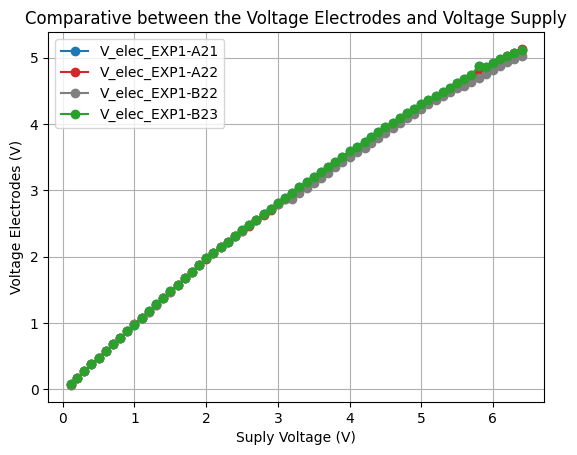

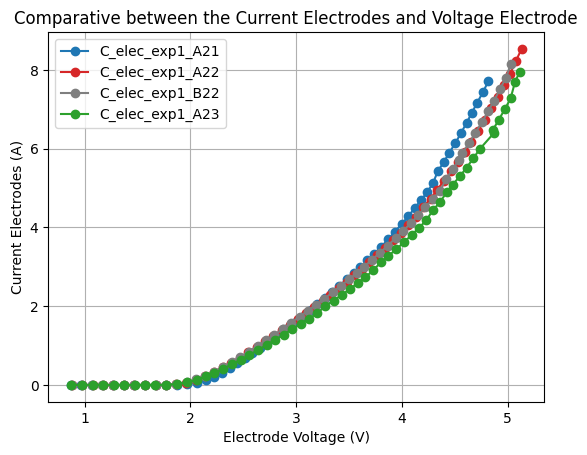

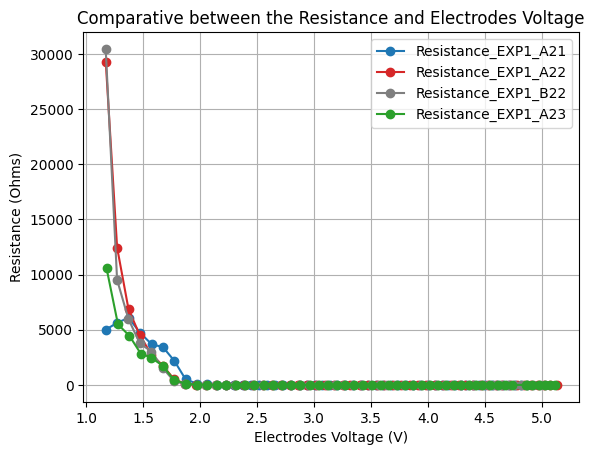

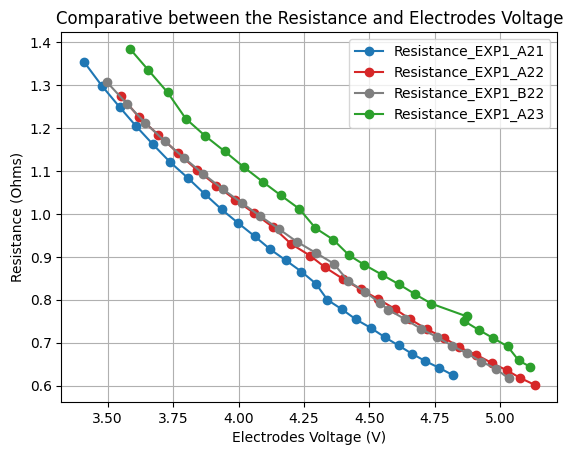

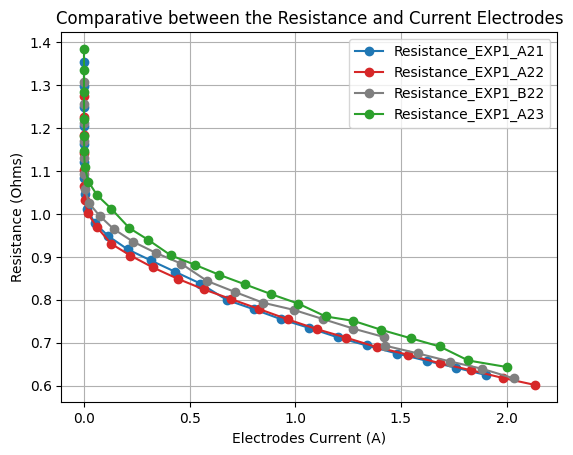

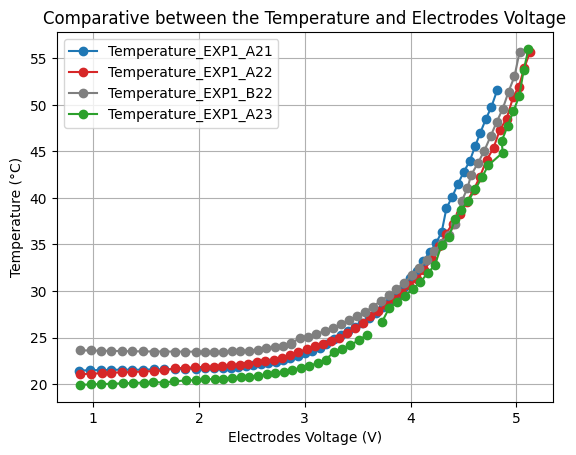

In [7]:
n1  =   _minlen(volt_iny_filt_r1, volt_elec_filt_r1_a_21, volt_elec_filt_r1_a_22, volt_elec_filt_r1_b_22, volt_elec_filt_r1_a_23)
x1  =   volt_iny_filt_r1[:n1]
y1  =   volt_elec_filt_r1_a_23
y2  =   volt_elec_filt_r1_a_22
y3  =   volt_elec_filt_r1_b_22
y4  =   volt_elec_filt_r1_a_23

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='V_elec_EXP1-A21')
plt.plot(x1, y2, marker='o', linestyle='-', color='tab:red', label='V_elec_EXP1-A22')
plt.plot(x1, y3, marker='o', linestyle='-', color='tab:gray', label='V_elec_EXP1-B22')
plt.plot(x1, y4, marker='o', linestyle='-', color='tab:green', label='V_elec_EXP1-B23')
plt.title('Comparative between the Voltage Electrodes and Voltage Supply')
plt.xlabel('Suply Voltage (V)')
plt.ylabel('Voltage Electrodes (V)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r1_A21, curr_elec_filt_r1_a_21, curr_elec_filt_r1_a_22, curr_elec_filt_r1_b_22, curr_elec_filt_r1_a_23)
x1  =   volt_elec_r1_A21[pos_curr:(n1+pos_curr)]
x2  =   volt_elec_r1_A22[pos_curr:(n1+pos_curr)]
x3  =   volt_elec_r1_B22[pos_curr:(n1+pos_curr)]
x4  =   volt_elec_r1_A23[pos_curr:(n1+pos_curr)]
y1  =   curr_elec_filt_r1_a_21
y2  =   curr_elec_filt_r1_a_22
y3  =   curr_elec_filt_r1_b_22
y4  =   curr_elec_filt_r1_a_23

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='C_elec_exp1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='C_elec_exp1_A22')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='C_elec_exp1_B22')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='C_elec_exp1_A23')
plt.title('Comparative between the Current Electrodes and Voltage Electrode')
plt.xlabel('Electrode Voltage (V)')
plt.ylabel('Current Electrodes (A)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r1_A21, res_filt_r1_a_21, res_filt_r1_a_22, res_filt_r1_b_22, res_filt_r1_a_23)
x1  =   volt_elec_r1_A21[pos_res1:(n1+pos_res1)]
x2  =   volt_elec_r1_A22[pos_res1:(n1+pos_res1)]
x3  =   volt_elec_r1_B22[pos_res1:(n1+pos_res1)]
x4  =   volt_elec_r1_A23[pos_res1:(n1+pos_res1)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_r1_a_21
y2  =   res_filt_r1_a_22
y3  =   res_filt_r1_b_22
y4  =   res_filt_r1_a_23        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_EXP1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_EXP1_A22')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Resistance_EXP1_B22')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Resistance_EXP1_A23')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r1_A21, res_filt_r1_a_21_1, res_filt_r1_a_22_1, res_filt_r1_b_22_1, res_filt_r1_a_23_1)
x1  =   volt_elec_r1_A21[pos_res2:(n1+pos_res2)]
x2  =   volt_elec_r1_A22[pos_res2:(n1+pos_res2)]
x3  =   volt_elec_r1_B22[pos_res2:(n1+pos_res2)]
x4  =   volt_elec_r1_A23[pos_res2:(n1+pos_res2)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_r1_a_21_1
y2  =   res_filt_r1_a_22_1
y3  =   res_filt_r1_b_22_1
y4  =   res_filt_r1_a_23_1        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_EXP1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_EXP1_A22')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Resistance_EXP1_B22')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Resistance_EXP1_A23')
plt.title('Comparative between the Resistance and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(curr_elec_r1_A21, res_filt_r1_a_21_1, res_filt_r1_a_22_1, res_filt_r1_b_22_1, res_filt_r1_a_23_1)
x1  =   curr_elec_r1_A21[pos_res1:(n1+pos_res1)]
x2  =   curr_elec_r1_A22[pos_res1:(n1+pos_res1)]
x3  =   curr_elec_r1_B22[pos_res1:(n1+pos_res1)]
x4  =   curr_elec_r1_A23[pos_res1:(n1+pos_res1)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   res_filt_r1_a_21_1
y2  =   res_filt_r1_a_22_1
y3  =   res_filt_r1_b_22_1
y4  =   res_filt_r1_a_23_1        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Resistance_EXP1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Resistance_EXP1_A22')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Resistance_EXP1_B22')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Resistance_EXP1_A23')
plt.title('Comparative between the Resistance and Current Electrodes')
plt.xlabel('Electrodes Current (A)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.show()

n1  =   _minlen(volt_elec_r1_A21, temp_filt_r1_a_21, temp_filt_r1_a_22, temp_filt_r1_b_22, temp_filt_r1_a_23)
x1  =   volt_elec_r1_A21[pos_curr:(n1+pos_curr)]
x2  =   volt_elec_r1_A22[pos_curr:(n1+pos_curr)]
x3  =   volt_elec_r1_B22[pos_curr:(n1+pos_curr)]
x4  =   volt_elec_r1_A23[pos_curr:(n1+pos_curr)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   temp_filt_r1_a_21
y2  =   temp_filt_r1_a_22
y3  =   temp_filt_r1_b_22
y4  =   temp_filt_r1_a_23        

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Temperature_EXP1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label='Temperature_EXP1_A22')
plt.plot(x3, y3, marker='o', linestyle='-', color='tab:grey', label='Temperature_EXP1_B22')
plt.plot(x4, y4, marker='o', linestyle='-', color='tab:green', label='Temperature_EXP1_A23')
plt.title('Comparative between the Temperature and Electrodes Voltage')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

# ANALYSIS EXPERIMENT 1 VS EXPERIMENT 2

ValueError: x and y must have same first dimension, but have shapes (51,) and (48,)

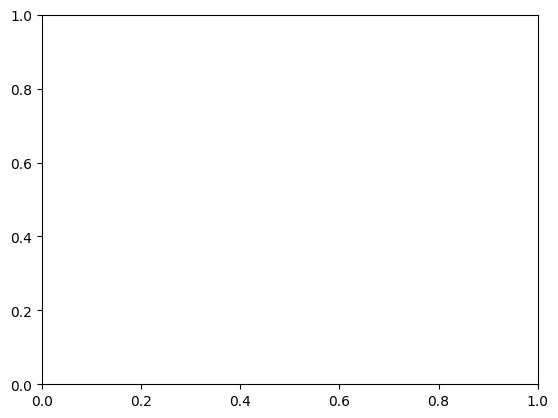

In [31]:
pos_curr_e1 =   8
pos_curr_e2 =   9

n1  =   _minlen(volt_elec_r1_A21, curr_elec_filt_r1_a_21, volt_elec_r2_A23, curr_elec_filt_r2_a_23)
x1  =   volt_elec_r1_A21[pos_curr_e1:(n1+pos_curr_e1)]
x2  =   volt_elec_r2_A23[pos_curr_e1:(n1+pos_curr_e1)]
#y1  =   [volt_elec_filt_20250917[i] - volt_elec_filt_20250922[i] for i in range(n1)]
y1  =   curr_elec_filt_r1_a_21[pos_curr_e1:(n1+pos_curr_e1)]
y2  =   curr_elec_filt_r2_a_23[pos_curr_e1:(n1+pos_curr_e1)]

plt.figure()
plt.plot(x1, y1, marker='o', linestyle='-', color='tab:blue', label='Current_Electrodes_EXP1_A21')
plt.plot(x2, y2, marker='o', linestyle='-', color='tab:red', label= 'Current_Electrodes_EXP2_A23')
plt.title('Comparative between the Current Electrodes and Electrodes Voltage (EXP1 vs EXP2)')
plt.xlabel('Electrodes Voltage (V)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.show()